# Analysis of Bike Sharing Rides with Bay Wheels Data
## by  Anastasia Kaliakova

## Investigation Overview

> Investigation of bike sharing trends of Bay Wheels system by location in Bay Area: San Francisco, Oakland, San Jose.

## Dataset Overview

> The data set includes information about individual rides made in the Bay Wheels bike-sharing in the California Bay Area for the period of time from June 2017 through July of 2019. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_df_city.csv')


In [3]:
# convert start and end dates of trips to date/time type 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df = df.sort_values(by='start_time')

df.dtypes

bike_id                             int64
bike_share_for_all_trip            object
duration_sec                        int64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
end_station_name                   object
end_time                   datetime64[ns]
member_birth_year                 float64
member_gender                      object
rental_access_method               object
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
start_station_name                 object
start_time                 datetime64[ns]
user_type                          object
age                                 int64
duration_min                        int64
city                               object
dtype: object

## Overall trend of bike use in San Francisco, San Jose, and Oakland.

> From the plot below it is apparent that the number of rides overtime is following similar pattern across all three cities. However there is an interesting difference to be observed: on the right end of the plot starting around June of 2019 the number of bike rides in Oakland and San Jose are incresing. That is in comparison to San Francisco where number of bike rides at that time period is in a sharp decline.

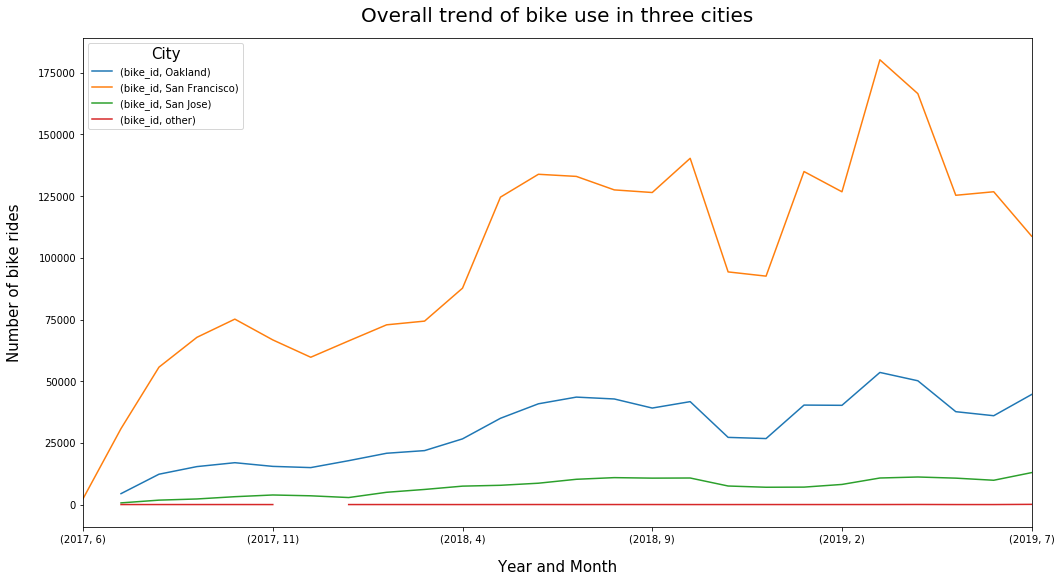

In [4]:
# arrange data by year/month and city 
df_year_city = df.groupby([df['start_time'].dt.year, df['start_time'].dt.month, 'city'])

# line plot of changes in bike use overtime for three cities
fig, ax = plt.subplots(figsize=(17,9));
df_year_city.agg({'bike_id':'count'}).unstack().plot(ax=ax);
plt.title('Overall trend of bike use in three cities', fontsize=20,  y=1.02);
plt.xlabel('Year and Month',labelpad=16, fontsize=15);
plt.ylabel('Number of bike rides',labelpad=16, fontsize=15);
leg = ax.legend();
leg.set_title('City',prop={'size':15});
ax = plt.gca();

## Percentage distribution of bike rides by gender and city.

> To compare users of the bike sharing service by gender I calculated percentage for each gender from total count of bike rides from each city. I have found that San Jose contains the largest percent of male bikers and Oakland has the lergest percent of female bikers. 

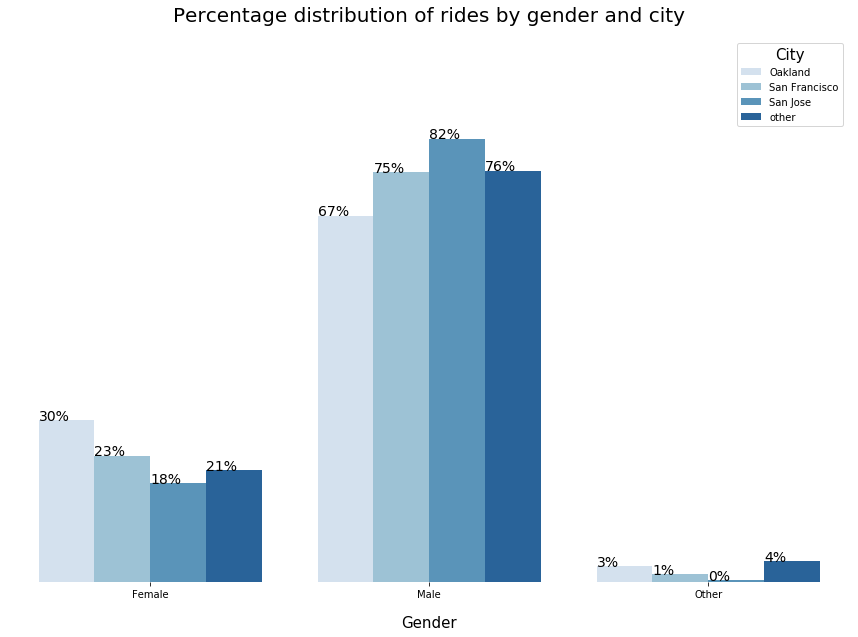

In [5]:
# filter for realistic age, remove outliers for age
df = df[df['age']<=60]

# mask for gender percentage
gen_pc = df.groupby(['city', 'member_gender']).agg({'bike_id': 'count'})

# calculate percentage from total bike rides for gender
gen_pcts = gen_pc.groupby(level=0).apply(lambda x: 100*x / float(x.sum()))

gen_pcts.reset_index(inplace=True)

# bar plot for gender distribution among cities
plt.figure(figsize=(15, 10));
ax = sb.barplot(x='member_gender',y = 'bike_id', hue = 'city', data = gen_pcts, palette = 'Blues');
ax.set(ylim=(0, 100));
ax.set_yticks(np.arange(0, 100 +10, 10));
plt.title('Percentage distribution of rides by gender and city', fontsize=20, y=1.02);
plt.xlabel('Gender', labelpad=16, fontsize=15);
leg = plt.legend();
leg.set_title('City',prop={'size':15});
plt.gca().yaxis.set_major_formatter(PercentFormatter(100));
plt.box(on=None);
plt.gca().axes.get_yaxis().set_visible(False);

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/100), (x, y + height ), fontsize=14);


## Percentage distribution of bike rides by user type and city.

> To explore and compare user type for each city I employed percentage count as well. Among three cities the largest percent of subscriber user type is in San Jose, and largest percent of customer user type is in San Francisco. On the outlires side I have noticed that people who ride bikes outsied of those cities show the largest percentage for customer user type overall. 

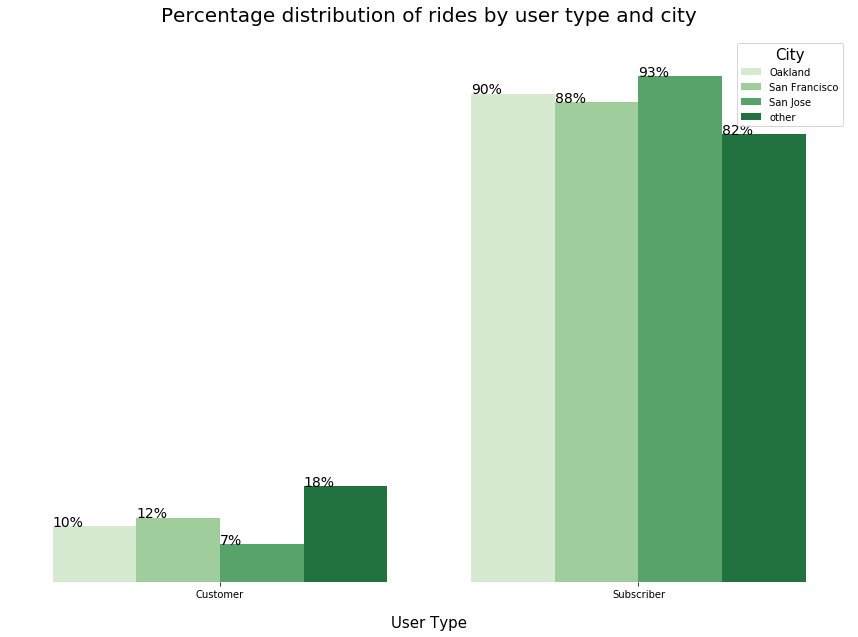

In [6]:
# mask for user type percentage
user_pc = df.groupby(['city', 'user_type']).agg({'bike_id': 'count'})

# calculate percentage from total bike rides for user type
user_pcts = user_pc.groupby(level=0).apply(lambda x: 100*x / float(x.sum()))
user_pcts.reset_index(inplace=True)

# bar plot for user type  distribution among cities
plt.figure(figsize=(15, 10));
ax = sb.barplot(x='user_type',y = 'bike_id', hue = 'city', data = user_pcts, palette = 'Greens');
ax.set(ylim=(0, 100));
ax.set_yticks(np.arange(0, 100 +10, 10));
plt.title('Percentage distribution of rides by user type and city', fontsize=20, y=1.02);
plt.xlabel('User Type', labelpad=16, fontsize=15);
leg = plt.legend();
leg.set_title('City',prop={'size':15});
plt.gca().yaxis.set_major_formatter(PercentFormatter(100));
plt.box(on=None);
plt.gca().axes.get_yaxis().set_visible(False);

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/100), (x, y + height ), fontsize=14);

## Duration of trips based on gender and city.

> Form the investigation of trip duration it is apperant that most of trips for all three cities are under 30 minutes long. In addition to that the box plot below is showing interesting tendency of female bikers taking longer trips in all of the three cities. We can also notice that trip duration for city category "Other" is significantly longer which could be indication of people traveling longer distances outside of cities.

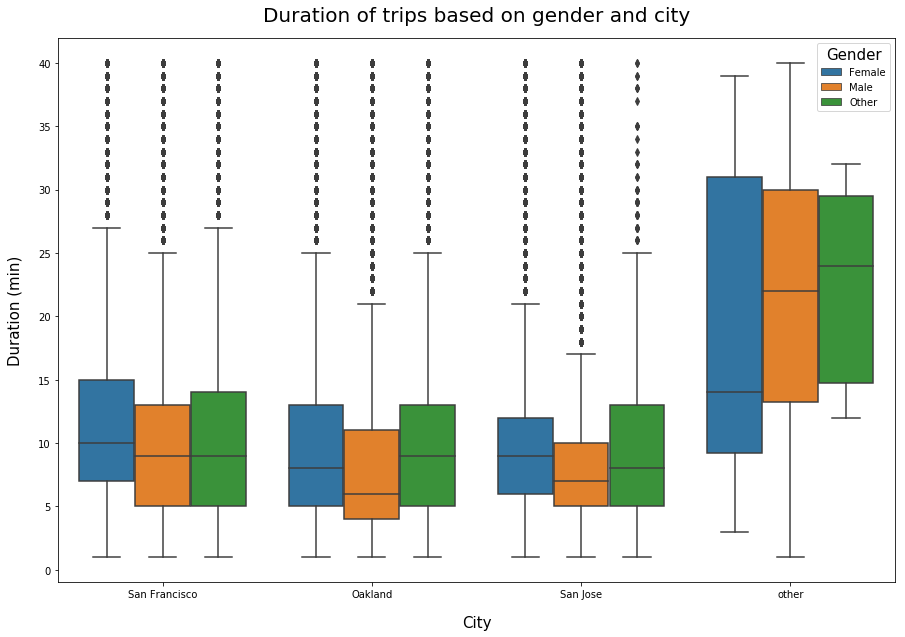

In [7]:
# adjust dataset for trip duration under 40 min 
df_duration_correct1 = df[df['duration_min'] <= 40]

# boxplot for trip duration distribution based on gender and city
plt.figure(figsize = [15, 10]);
sb.boxplot(data = df_duration_correct1, x='city', y='duration_min', hue='member_gender');
plt.title('Duration of trips based on gender and city', fontsize=20, y=1.02);
plt.xlabel('City',labelpad=16, fontsize=15);
plt.ylabel('Duration (min)',labelpad=16, fontsize=15);
leg = plt.legend();
leg.set_title('Gender',prop={'size':15});

In [ ]:
!jupyter nbconvert "slide_deck_template_finished-2.ipynb" --to slides --post serve --template output_toggle.tpl

[NbConvertApp] Converting notebook slide_deck_template_finished-2.ipynb to slides
[NbConvertApp] Writing 475945 bytes to slide_deck_template_finished-2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template_finished-2.slides.html
Use Control-C to stop this server
